In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import glob
import os
warnings.filterwarnings('ignore')
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
pd.set_option('display.max_columns', None)

In [2]:
DF_09 = pd.read_csv('2009/STUDENT.csv')
DF_10 = pd.read_csv('2010/STUDENT.csv')
DF_11 = pd.read_csv('2011/STUDENT.csv')
DF_12 = pd.read_csv('2012/STUDENT.csv')
DF_13 = pd.read_csv('2013/STUDENT.csv')
DF_14 = pd.read_csv('2014/STUDENT.csv')
DF_15 = pd.read_csv('2015/STUDENT.csv')
DF_16 = pd.read_csv('2016/STUDENT.csv')
DF_17 = pd.read_csv('2017/STUDENT.csv')
DF_18 = pd.read_csv('2018/STUDENT.csv')
DF_19 = pd.read_csv('2019/STUDENT.csv')

In [3]:
#cols = ['CBO Ocupação 2002','Tipo Vínculo','Faixa Remun Média (SM)']
#RAIS_09 = pd.concat([pd.read_csv(f, delimiter=";", encoding = "ISO-8859-1", usecols = cols
                               # ) for f in glob.glob('/home/black/data/RAIS/2009/*.txt')],ignore_index=True)
#RAIS_2009 = pd.read_csv('~/data/RAIS/2009/MA2009.txt', encoding = "ISO-8859-1", delimiter= ';', usecols=cols)

In [4]:
DF = pd.concat([DF_09,DF_10,DF_11,DF_12,DF_13,DF_14,DF_15,DF_16,DF_17,DF_18, DF_19])

In [ ]:
#DIMAS
DF = DF[DF.CO_UF == 31]
DF = DF[(DF.CO_DEPENDENCIA_ADM== 2) | (DF.CO_DEPENDENCIA_ADM == 3)]
DF['DIVERSIDADE'] = DF.NU_TEACHERS/DF.NU_TEACHERS_DOMAIN
fields = DF.filter(regex=("^IN_FOR_*")).columns
COLUMNS = fields.to_list() + ["DIVERSIDADE", 'CO_ANO', 'CO_ESCOLA','CO_MUNICIPIO','CO_DEPENDENCIA_ADM']
mungeo = pd.read_csv("~/data/geodata/mun_micro_meso.csv")
#CENSO = pd.merge(C_SCHOOL, C_CLASS, on = 'CO_ESCOLA', how = 'inner')
cidade = pd.merge(mungeo, DF, right_on = "CO_MUNICIPIO", left_on ='codigo_ibge', how = 'inner' )
for i in fields:   
    
        cidade[i] = cidade.groupby(['CO_ANO','CO_MUNICIPIO'])[i].transform('mean')
        
cidade.drop_duplicates(['CO_ANO','CO_MUNICIPIO'], inplace=True)   
#cidade[fields.to_list()+['nome','nome_meso', 'nome_micro']].to_csv()

In [6]:
cidade.head()

,codigo_ibge,nome,latitude,longitude,capital,cod_uf_meso,codigo_uf,cod_meso_micro,cod_meso,nome_meso,cod_micro,nome_micro,nome_uf,Unnamed: 0,CO_ANO,CO_ESCOLA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,EDU_PAI,EDU_MAE,QT_PESSOAS_CASA,RENDA_MENSAL,NU_NOTA_GERAL,CO_MUNICIPIO,CO_UF,CO_DEPENDENCIA_ADM,IN_AGUA_INEXISTENTE,IN_ESGOTO_INEXISTENTE,IN_ENERGIA_INEXISTENTE,IN_LABORATORIO_INFORMATICA,IN_LABORATORIO_CIENCIAS,IN_SALA_ATENDIMENTO_ESPECIAL,IN_BIBLIOTECA,IN_SALA_LEITURA,IN_BANHEIRO,IN_BANHEIRO_PNE,QT_SALAS_UTILIZADAS,QT_EQUIP_TV,QT_EQUIP_DVD,QT_EQUIP_COPIADORA,QT_EQUIP_IMPRESSORA,QT_COMP_ALUNO,IN_INTERNET,IN_BANDA_LARGA,QT_FUNCIONARIOS,IN_ALIMENTACAO,IN_COMUM_MEDIO_MEDIO,IN_COMUM_MEDIO_INTEGRADO,IN_COMUM_MEDIO_NORMAL,IN_SALA_PROFESSOR,IN_QUADRA_ESPORTES,IN_COZINHA,IN_EQUIP_PARABOLICA,IN_ATIV_COMPLEMENTAR,QT_MATRICULAS,ID_QUIMICA,ID_FISICA,ID_MATEMATICA,ID_BIOLOGIA,ID_SOCIOLOGIA,ID_LINGUA_LITERAT_PORTUGUESA,ID_LINGUA_LITERAT_INGLES,ID_LINGUA_LITERAT_ESPANHOL,ID_ARTES,ID_EDUCACAO_FISICA,ID_HISTORIA,ID_GEOGRAFIA,ID_FILOSOFIA,ID_LICENCIATURA_1,ID_LICENCIATURA_2,ID_LICENCIATURA_3,TITULACAO,NU_GRADUACAO,NU_ESPECIALIZACAO,NU_MESTRADO,NU_DOUTORADO,ID_LINGUA_ESTRANGEIRA,ID_FISIO_SOCIO,NU_CIENCIA_NATUREZA,NU_CIENCIAS_HUMANAS,NU_LINGUAGENS_CODIGOS,NU_MATEMATICA,NU_TEACHERS_DOMAIN,NU_ESCOLAS,NU_LICENCIADOS,NU_TEACHERS,FOR_MATEMATICA,FOR_FISICA,FOR_QUIMICA,FOR_HISTORIA,FOR_BIOLOGIA,FOR_GEOGRAFIA,FOR_LING_PORTUGUES,FOR_LING_ESTRANGEIRA,FOR_FISIO_SOCIO,FOR_ARTES,FOR_EDUCACAO_FISICA,IN_FOR_MAT,IN_FOR_FIS,IN_FOR_QUI,IN_FOR_HIST,IN_FOR_BIO,IN_FOR_GEO,IN_FOR_PORT,IN_FOR_EST,IN_FOR_FISIO_SOCIO,IN_FOR_ARTES,IN_FOR_ED_FISICA,IN_FORM_DOCENTE,CO_PROFESSOR,CO_TURMA,IN_ESPECIALIZACAO,IN_MESTRADO,IN_DOUTORADO,CO_AREA_OCDE_1,CO_AREA_OCDE_2,CO_AREA_OCDE_3,OUTROS,DIVERSIDADE
0,3100104,Abadia dos Dourados,-18.4831,-47.3916,0,3105,31,5019,5,Triângulo Mineiro/Alto Paranaíba,19,Patrocínio,Minas Gerais,536333,2009,31200271.0,18.0,1.0,1.0,2.0,451.7,474.6,433.5,499.0,525.0,1.0,2.0,1.0,3.0,476.76,3100104,31,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,17.0,1.0,1.0,0.0,1.0,6.0,1.0,1.0,59.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,29.500000,1.0,1.0,5.0,0.0,0.0,7.0,0.0,0.0,2.0,3.0,2.0,4.0,0.0,1.0,NaN,NaN,0.096774,22,9,0,0,3.0,1.0,0.074074,0.259259,0.481481,0.185185,27.0,1.000000,1.000000,27,5,1,0,2,0,3,7,1,0,0,3,1.000000,1.0,0.5,1.00,0.0,0.875000,1.00,0.666667,0.5,0.5,1.0,0.731061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0000
39,3100104,Abadia dos Dourados,-18.4831,-47.3916,0,3105,31,5019,5,Triângulo Mineiro/Alto Paranaíba,19,Patrocínio,Minas Gerais,608830,2010,31200271.0,17.0,1.0,1.0,2.0,460.9,469.1,542.6,487.0,350.0,2.0,4.0,2.0,2.0,461.92,3100104,31,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,17.0,1.0,1.0,1.0,1.0,6.0,1.0,1.0,57.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,29.500000,2.0,1.0,4.0,1.0,0.0,5.0,0.0,0.0,1.0,2.0,2.0,3.0,0.0,1.0,NaN,NaN,0.086022,23,8,0,0,3.0,2.0,0.153846,0.269231,0.423077,0.153846,26.0,1.076923,1.000000,26,4,1,0,2,1,2,5,0,0,0,2,1.000000,1.0,0.5,1.00,1.0,0.833333,1.00,0.500000,0.5,0.5,1.0,0.803030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0000
77,3100104,Abadia dos Dourados,-18.4831,-47.3916,0,3105,31,5019,5,Triângulo Mineiro/Alto Paranaíba,19,Patrocínio,Minas Gerais,784436,2011,31200271.0,17.0,1.0,1.0,2.0,400.2,416.6,452.2,610.9,460.0,4.0,5.0,2.0,2.0,467.98,3100104,31,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,17.0,1.0,1.0,1.0,1.0,21.0,1.0,1.0,73.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,30.500000,2.0,1.0,7.0,0.0,0.0,6.0,0.0,0.0,1.0,4.0,3.0,4.0,0.0,1.0,NaN,NaN,0.085714,26,9,0,0,3.0,1.0,0.093750,0.250000,0.437500,0.218750,32.0,1.096774,0.884615,26,4,1,0,3,0,3,0,1,0,0,0,0.785714,1.0,0.5,1.00,0.0,0.875000,0.50,0.666667,0.5,0.5,0.5,0.620671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8125
122,3100104,Abadia dos Dourados,-18.4831,-47.3916,0,3105,31,5019,5,Triângulo Mineiro/Alto Paranaíba,19,Patrocínio,Minas Gerais,382168,2012,31200271.0,18.0,0.0,1.0,2.0,412.8,522.1,494.6,508.2,520.0,2.0,2.0,2.0,4.0,491.54,3100104,31,2,0.

In [ ]:
cidade[COLUMNS.to_list()+['nome','nome_meso', 'nome_micro']].to_csv()

In [18]:
cidade[fields.to_list()+['nome','nome_meso', 'nome_micro', 'CO_ANO']].to_csv('Dimas.csv', index =False)

In [15]:
cidade[fields.to_list()+['nome','nome_meso', 'nome_micro', 'CO_ANO']]

,IN_FOR_MAT,IN_FOR_FIS,IN_FOR_QUI,IN_FOR_HIST,IN_FOR_BIO,IN_FOR_GEO,IN_FOR_PORT,IN_FOR_EST,IN_FOR_FISIO_SOCIO,IN_FOR_ARTES,IN_FOR_ED_FISICA,IN_FORM_DOCENTE,nome,nome_meso,nome_micro,CO_ANO
0,1.000000,1.0,0.5,1.000000,0.00,0.875000,1.000000,0.666667,0.50,0.5,1.0,0.731061,Abadia dos Dourados,Triângulo Mineiro/Alto Paranaíba,Patrocínio,2009
39,1.000000,1.0,0.5,1.000000,1.00,0.833333,1.000000,0.500000,0.50,0.5,1.0,0.803030,Abadia dos Dourados,Triângulo Mineiro/Alto Paranaíba,Patrocínio,2010
77,0.785714,1.0,0.5,1.000000,0.00,0.875000,0.500000,0.666667,0.50,0.5,0.5,0.620671,Abadia dos Dourados,Triângulo Mineiro/Alto Paranaíba,Patrocínio,2011
122,0.833333,0.5,0.5,1.000000,1.00,0.875000,0.600000,0.500000,0.50,0.5,0.5,0.664394,Abadia dos Dourados,Triângulo Mineiro/Alto Paranaíba,Patrocínio,2012
178,0.800000,1.0,0.5,0.750000,1.00,0.875000,0.750000,0.500000,0.50,0.5,0.5,0.697727,Abadia dos Dourados,Triângulo Mineiro/Alto Paranaíba,Patrocínio,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903151,1.000000,1.0,0.5,1.000000,1.00,0.750000,0.500000,0.500000,0.50,0.0,0.5,0.659091,Wenceslau Braz,Sul/Sudoeste de Minas,Itajubá,2014
903172,1.000000,1.0,0.5,1.000000,0.50,0.750000,0.666667,0.500000,0.50,0.5,0.5,0.674242,Wenceslau Braz,Sul/Sudoeste de Minas,Itajubá,2016
903190,0.875000,1.0,0.5,0.833333,0.75,0.750000,0.750000,0.500000,0.75,0.5,0.5,0.700758,Wenceslau Braz,Sul/Sudoeste de Minas,Itajubá,2017
903206,0.875000,1.0,0.5,0.750000,1.00,1.000000,0.833333,0.500000,0.75,0.5,0.5,0.746212,Wenceslau Braz,Sul/Sudoeste de Minas,Itajubá,2018


In [7]:
#DIMAS
DF = DF[DF.CO_UF == 31]
DF = DF[(DF.CO_DEPENDENCIA_ADM== 2) | (DF.CO_DEPENDENCIA_ADM == 3)]
DF['DIVERSIDADE'] = DF.NU_TEACHERS/DF.NU_TEACHERS_DOMAIN
fields = DF.filter(regex=("^IN_FOR_*")).columns
COLUMNS = fields.to_list() + ["DIVERSIDADE", 'CO_ANO', 'CO_ESCOLA','CO_MUNICIPIO','CO_DEPENDENCIA_ADM']
mungeo = pd.read_csv("~/data/geodata/mun_micro_meso.csv")
#CENSO = pd.merge(C_SCHOOL, C_CLASS, on = 'CO_ESCOLA', how = 'inner')
cidade = pd.merge(mungeo, DF, right_on = "CO_MUNICIPIO", left_on ='codigo_ibge', how = 'inner' )
for i in fields:   
    
        cidade[i] = cidade.groupby(['CO_ANO','CO_MUNICIPIO'])[i].transform('mean')
        
cidade.drop_duplicates(['CO_ANO','CO_MUNICIPIO'], inplace=True)   
cidade[fields.to_list()+['nome','nome_meso', 'nome_micro']].to_csv()

In [ ]:
DF[(DF.CO_DEPENDENCIA_ADM== 2) | (DF.CO_DEPENDENCIA_ADM == 3)].groupby('CO_ANO')['IN_QUADRA_ESPORTES'].mean()



In [5]:
# Some features are binary for some years and quantity for others. Then, we need to binary all
quantity_to_binary = ['QT_EQUIP_TV', 'QT_EQUIP_DVD', 'QT_EQUIP_COPIADORA','QT_EQUIP_IMPRESSORA', 'IN_EQUIP_PARABOLICA']
for i in quantity_to_binary:
    DF.loc[DF[i]>0, i] = 1

In [6]:
k= pd.DataFrame()
k['miss'] = DF.isnull().sum()/DF.shape[0]
k['type'] = DF.dtypes
k.T

,Unnamed: 0,CO_ANO,CO_ESCOLA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,EDU_PAI,EDU_MAE,QT_PESSOAS_CASA,RENDA_MENSAL,NU_NOTA_GERAL,CO_MUNICIPIO,CO_UF,CO_DEPENDENCIA_ADM,IN_AGUA_INEXISTENTE,IN_ESGOTO_INEXISTENTE,IN_ENERGIA_INEXISTENTE,IN_LABORATORIO_INFORMATICA,IN_LABORATORIO_CIENCIAS,IN_SALA_ATENDIMENTO_ESPECIAL,IN_BIBLIOTECA,IN_SALA_LEITURA,IN_BANHEIRO,IN_BANHEIRO_PNE,QT_SALAS_UTILIZADAS,QT_EQUIP_TV,QT_EQUIP_DVD,QT_EQUIP_COPIADORA,QT_EQUIP_IMPRESSORA,QT_COMP_ALUNO,IN_INTERNET,IN_BANDA_LARGA,QT_FUNCIONARIOS,IN_ALIMENTACAO,IN_COMUM_MEDIO_MEDIO,IN_COMUM_MEDIO_INTEGRADO,IN_COMUM_MEDIO_NORMAL,IN_SALA_PROFESSOR,IN_QUADRA_ESPORTES,IN_COZINHA,IN_EQUIP_PARABOLICA,IN_ATIV_COMPLEMENTAR,QT_MATRICULAS,ID_QUIMICA,ID_FISICA,ID_MATEMATICA,ID_BIOLOGIA,ID_SOCIOLOGIA,ID_LINGUA_LITERAT_PORTUGUESA,ID_LINGUA_LITERAT_INGLES,ID_LINGUA_LITERAT_ESPANHOL,ID_ARTES,ID_EDUCACAO_FISICA,ID_HISTORIA,ID_GEOGRAFIA,ID_FILOSOFIA,ID_LICENCIATURA_1,ID_LICENCIATURA_2,ID_LICENCIATURA_3,TITULACAO,NU_GRADUACAO,NU_ESPECIALIZACAO,NU_MESTRADO,NU_DOUTORADO,ID_LINGUA_ESTRANGEIRA,ID_FISIO_SOCIO,NU_CIENCIA_NATUREZA,NU_CIENCIAS_HUMANAS,NU_LINGUAGENS_CODIGOS,NU_MATEMATICA,NU_TEACHERS_DOMAIN,NU_ESCOLAS,NU_LICENCIADOS,NU_TEACHERS,FOR_MATEMATICA,FOR_FISICA,FOR_QUIMICA,FOR_HISTORIA,FOR_BIOLOGIA,FOR_GEOGRAFIA,FOR_LING_PORTUGUES,FOR_LING_ESTRANGEIRA,FOR_FISIO_SOCIO,FOR_ARTES,FOR_EDUCACAO_FISICA,IN_FOR_MAT,IN_FOR_FIS,IN_FOR_QUI,IN_FOR_HIST,IN_FOR_BIO,IN_FOR_GEO,IN_FOR_PORT,IN_FOR_EST,IN_FOR_FISIO_SOCIO,IN_FOR_ARTES,IN_FOR_ED_FISICA,IN_FORM_DOCENTE,CO_PROFESSOR,CO_TURMA,IN_ESPECIALIZACAO,IN_MESTRADO,IN_DOUTORADO,CO_AREA_OCDE_1,CO_AREA_OCDE_2,CO_AREA_OCDE_3,OUTROS
miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.571439,0.571439,0.571439,0.571439,0.571439,0.571439,0.571439,0.571439,0.571439,0.571439,0.571439,0.571439,0.571439,0.584255,0.869392,0.890391,0.0,0.0,0.0,0.0,0.0,0.571439,0.571439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.428561,0.428561,0.428561,0.428561,0.428561,0.433785,0.607863,0.619916,0.428561
type,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,object,object,object,float64


In [7]:
fields = ['IN_AGUA_INEXISTENTE', 'IN_ESGOTO_INEXISTENTE', 'IN_ENERGIA_INEXISTENTE', 'QT_EQUIP_TV','QT_EQUIP_DVD', 
          'QT_COM_ADMINISTRATIVO','QT_EQUIP_IMPRESSORA','QT_EQUIP_COPIADORA', 'IN_BANDA_LARGA', 'IN_BIBLIOTECA', 
          'IN_LABORATORIO_INFORMATICA', 'IN_LABORATORIO_CIENCIAS',]

DF['IN_INFRA_NENHUMA'] = 1


infra_elementar = (DF.IN_AGUA_INEXISTENTE==0) & (DF.IN_ESGOTO_INEXISTENTE==0)&(DF.IN_ENERGIA_INEXISTENTE ==0)
infra_basica = (DF.QT_EQUIP_TV!=0) & (DF.QT_EQUIP_DVD !=0) & (DF.IN_BANHEIRO!=0) & (DF.QT_EQUIP_IMPRESSORA!=0)

infra_adequada = (DF.QT_EQUIP_COPIADORA != 0)&(DF.IN_BANDA_LARGA != 0)|(DF.IN_BIBLIOTECA!=0)&(
    DF.IN_LABORATORIO_INFORMATICA!=0) 

infra_avancada = (DF.IN_LABORATORIO_CIENCIAS!=0)

DF.loc[(infra_elementar), 'IN_INFRA_ELEMENTAR'] = 1
DF.loc[((infra_elementar) & (infra_basica)), 'IN_INFRA_BASICA'] = 1
DF.loc[((infra_elementar)& (infra_basica) & (infra_adequada)), 'IN_INFRA_ADEQUADA'] = 1
DF.loc[((infra_elementar)& (infra_basica) & (infra_adequada) & (infra_avancada)), 'IN_INFRA_AVANCADA'] = 1

DF.loc[DF['IN_INFRA_ELEMENTAR']==1, 'IN_INFRA_NENHUMA']=0
DF.loc[(DF.IN_INFRA_ELEMENTAR==1) & (DF.IN_INFRA_BASICA==1), 'IN_INFRA_ELEMENTAR'] = 0
DF.loc[(DF.IN_INFRA_BASICA==1) & (DF.IN_INFRA_ADEQUADA==1), 'IN_INFRA_BASICA'] = 0
DF.loc[(DF.IN_INFRA_ADEQUADA==1) & (DF.IN_INFRA_AVANCADA==1), 'IN_INFRA_ADEQUADA'] = 0

DF[['IN_INFRA_ELEMENTAR', 'IN_INFRA_BASICA', 'IN_INFRA_ADEQUADA', 
    'IN_INFRA_AVANCADA']] = DF[['IN_INFRA_ELEMENTAR', 'IN_INFRA_BASICA', 'IN_INFRA_ADEQUADA', 
                                'IN_INFRA_AVANCADA']].fillna(0)

DF['IN_TP_ESCOLA'] = ""
DF.loc[(DF.CO_DEPENDENCIA_ADM== 2) | (DF.CO_DEPENDENCIA_ADM == 3), 'IN_TP_ESCOLA']= 'Municipal+Estadual'
DF.loc[(DF.CO_DEPENDENCIA_ADM == 4), 'IN_TP_ESCOLA'] = 'Privada'
DF.loc[(DF.CO_DEPENDENCIA_ADM == 1), 'IN_TP_ESCOLA'] = 'Federal'

In [8]:
DF.loc[DF['RENDA_MENSAL']==0, 'RENDA_NUM']=0
DF.loc[DF['RENDA_MENSAL']==1, 'RENDA_NUM']= 1039/2
DF.loc[DF['RENDA_MENSAL']==2, 'RENDA_NUM']= ((1039*2 - 1039)/2)+1039
DF.loc[DF['RENDA_MENSAL']==3, 'RENDA_NUM']=((1039*5 - 1039*2)/2)+1039*2
DF.loc[DF['RENDA_MENSAL']==4, 'RENDA_NUM']=((1039*10 - 1039*5)/2)+1039*5
DF.loc[DF['RENDA_MENSAL']==5, 'RENDA_NUM']=1039*10

DF['QT_PESSOAS_CASA'] = DF['QT_PESSOAS_CASA']+1
DF['RENDA_PERCAPITA']= DF.RENDA_NUM/DF.QT_PESSOAS_CASA


In [9]:
DF[DF.OUTROS==0]['CO_ANO'].unique()

array([2012, 2014, 2016, 2017, 2018, 2019])

In [10]:
DF.head()

,Unnamed: 0,CO_ANO,CO_ESCOLA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,EDU_PAI,EDU_MAE,QT_PESSOAS_CASA,RENDA_MENSAL,NU_NOTA_GERAL,CO_MUNICIPIO,CO_UF,CO_DEPENDENCIA_ADM,IN_AGUA_INEXISTENTE,IN_ESGOTO_INEXISTENTE,IN_ENERGIA_INEXISTENTE,IN_LABORATORIO_INFORMATICA,IN_LABORATORIO_CIENCIAS,IN_SALA_ATENDIMENTO_ESPECIAL,IN_BIBLIOTECA,IN_SALA_LEITURA,IN_BANHEIRO,IN_BANHEIRO_PNE,QT_SALAS_UTILIZADAS,QT_EQUIP_TV,QT_EQUIP_DVD,QT_EQUIP_COPIADORA,QT_EQUIP_IMPRESSORA,QT_COMP_ALUNO,IN_INTERNET,IN_BANDA_LARGA,QT_FUNCIONARIOS,IN_ALIMENTACAO,IN_COMUM_MEDIO_MEDIO,IN_COMUM_MEDIO_INTEGRADO,IN_COMUM_MEDIO_NORMAL,IN_SALA_PROFESSOR,IN_QUADRA_ESPORTES,IN_COZINHA,IN_EQUIP_PARABOLICA,IN_ATIV_COMPLEMENTAR,QT_MATRICULAS,ID_QUIMICA,ID_FISICA,ID_MATEMATICA,ID_BIOLOGIA,ID_SOCIOLOGIA,ID_LINGUA_LITERAT_PORTUGUESA,ID_LINGUA_LITERAT_INGLES,ID_LINGUA_LITERAT_ESPANHOL,ID_ARTES,ID_EDUCACAO_FISICA,ID_HISTORIA,ID_GEOGRAFIA,ID_FILOSOFIA,ID_LICENCIATURA_1,ID_LICENCIATURA_2,ID_LICENCIATURA_3,TITULACAO,NU_GRADUACAO,NU_ESPECIALIZACAO,NU_MESTRADO,NU_DOUTORADO,ID_LINGUA_ESTRANGEIRA,ID_FISIO_SOCIO,NU_CIENCIA_NATUREZA,NU_CIENCIAS_HUMANAS,NU_LINGUAGENS_CODIGOS,NU_MATEMATICA,NU_TEACHERS_DOMAIN,NU_ESCOLAS,NU_LICENCIADOS,NU_TEACHERS,FOR_MATEMATICA,FOR_FISICA,FOR_QUIMICA,FOR_HISTORIA,FOR_BIOLOGIA,FOR_GEOGRAFIA,FOR_LING_PORTUGUES,FOR_LING_ESTRANGEIRA,FOR_FISIO_SOCIO,FOR_ARTES,FOR_EDUCACAO_FISICA,IN_FOR_MAT,IN_FOR_FIS,IN_FOR_QUI,IN_FOR_HIST,IN_FOR_BIO,IN_FOR_GEO,IN_FOR_PORT,IN_FOR_EST,IN_FOR_FISIO_SOCIO,IN_FOR_ARTES,IN_FOR_ED_FISICA,IN_FORM_DOCENTE,CO_PROFESSOR,CO_TURMA,IN_ESPECIALIZACAO,IN_MESTRADO,IN_DOUTORADO,CO_AREA_OCDE_1,CO_AREA_OCDE_2,CO_AREA_OCDE_3,OUTROS,IN_INFRA_NENHUMA,IN_INFRA_ELEMENTAR,IN_INFRA_BASICA,IN_INFRA_ADEQUADA,IN_INFRA_AVANCADA,IN_TP_ESCOLA,RENDA_NUM,RENDA_PERCAPITA
0,0,2009,33052182.0,19.0,1.0,0.0,2.0,409.2,323.1,376.7,360.5,475.0,0.0,0.0,3.0,2.0,388.90,3305752,33,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,16.0,1.0,1.0,1.0,1.0,10.0,1.0,1.0,110.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,35.666667,3.0,1.0,9.0,3.0,0.0,8.0,0.0,0.0,2.0,6.0,4.0,6.0,0.0,1.0,NaN,NaN,0.074074,42,12,0,0,5.0,1.0,0.145833,0.229167,0.4375,0.1875,48.0,1.291667,0.979167,48,6,0,2,4,1,3,8,0,0,2,6,0.833333,0.5,0.833333,1.0,0.666667,0.75,1.0,0.5,0.5,1.0,1.0,0.780303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,1.0,0.0,Municipal+Estadual,1558.5,519.500000
1,1,2009,33052182.0,18.0,0.0,1.0,2.0,390.1,448.2,397.2,422.0,750.0,2.0,3.0,2.0,2.0,481.50,3305752,33,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,16.0,1.0,1.0,1.0,1.0,10.0,1.0,1.0,110.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,35.666667,3.0,1.0,9.0,3.0,0.0,8.0,0.0,0.0,2.0,6.0,4.0,6.0,0.0,1.0,NaN,NaN,0.074074,42,12,0,0,5.0,1.0,0.145833,0.229167,0.4375,0.1875,48.0,1.291667,0.979167,48,6,0,2,4,1,3,8,0,0,2,6,0.833333,0.5,0.833333,1.0,0.666667,0.75,1.0,0.5,0.5,1.0,1.0,0.780303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,1.0,0.0,Municipal+Estadual,1558.5,779.250000
2,2,2009,33052182.0,17.0,0.0,3.0,3.0,408.6,525.6,509.9,486.5,700.0,2.0,3.0,3.0,3.0,526.12,3305752,33,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,16.0,1.0,1.0,1.0,1.0,10.0,1.0,1.0,110.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,35.666667,3.0,1.0,9.0,3.0,0.0,8.0,0.0,0.0,2.0,6.0,4.0,6.0,0.0,1.0,NaN,NaN,0.074074,42,12,0,0,5.0,1.0,0.145833,0.229167,0.4375,0.1875,48.0,1.291667,0.979167,48,6,0,2,4,1,3,8,0,0,2,6,0.833333,0.5,0.833333,1.0,0.666667,0.75,1.0,0.5,0.5,1.0,1.0,0.780303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,1.0,0.0,Municipal+Estadual,3636.5,1212.166667
3,3,2009,33052182.0,19.0,0.0,3.0,2.0,512.7,482.6,493.1,418.2,600.0,1.0,1.0,3.0,2.0,501.32,3305752,33,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,16.0,1.0,1.0,1.0,1.0,10.0,1.0,1.0,110.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,35.666667,3.0,1.0,9.0,3.0,0.0,8.0,0.0,0.0,2.0,6.0,4.0,6.0,0.0,1.0,NaN,NaN,0.074074,42,12,0,0,5.0,1.0,0.145833,0.229167,0.4375,0.1875,48.0,1.291667,0.979167,48,6,0,2,4,1,3,8,0,0,2,6,0.833333,0.5,0.833333,1.0,0.666667,0.75,1.0,0.5,0.5,1.0,1.0,0.780303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
COLUMNS = DF[(DF.CO_DEPENDENCIA_ADM== 2) | (DF.CO_DEPENDENCIA_ADM == 3)].filter(regex=("^IN_FOR_*")).columns.to_list()
COLUMNS.append(CO_ANO)

In [ ]:
DF[COLUMNS].groupby('CO_ANO').mean()

In [ ]:
COLUMNS

In [ ]:
a

In [36]:
a[len(a):] = ['CO_ANO']

In [21]:
COLUMNS2 = COLUMNS.to_list().append('CO_ANO')
DF[COLUMNS2].groupby('CO_ANO').mean(axis=0)

KeyError: None

In [77]:
ciencias_humanas = ['ID_HISTORIA', 'ID_GEOGRAFIA','ID_FILOSOFIA', 'ID_SOCIOLOGIA']
linguagens_codigos = ['ID_LINGUA_LITERAT_PORTUGUESA', 'ID_LINGUA_LITERAT_ESPANHOL',
                      'ID_LINGUA_LITERAT_INGLES', 'ID_ARTES', 'ID_EDUCACAO_FISICA']
matematica = ['ID_MATEMATICA']
ciencias_natureza = ['ID_FISICA', 'ID_QUIMICA', 'ID_BIOLOGIA']


<AxesSubplot:>

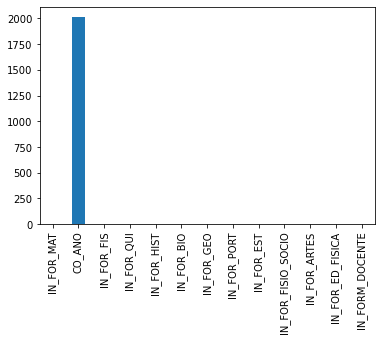

In [102]:
in_for_subjects = DF[COLUMNS].mean(axis=0)
in_for_subjects.plot(kind='bar')

In [17]:
teste = DF[(DF.CO_DEPENDENCIA_ADM== 2) | (DF.CO_DEPENDENCIA_ADM == 3)]
#teste = teste['IN_FORM_DOCENTE','NU_TEACHERS', 'NU_TEACHERS_DOMAIN', 'CO_ANO', 'NU_LINGUAGENS',
#             'NU_CIENCIA_NATUREZA', 'NU_CIENCIAS_HUMANAS' ,'NU_LINGUAGENS_CODIGOS' ,'NU_MATEMATICA']
#teste['DIVERSIDADE'] = teste.NU_TEACHERS/teste.NU_TEACHERS_DOMAIN
#teste.groupby('CO_ANO').mean()

In [23]:
teste = teste[['IN_FORM_DOCENTE','NU_TEACHERS', 'NU_TEACHERS_DOMAIN', 'CO_ANO', 'NU_CIENCIA_NATUREZA', 'NU_CIENCIAS_HUMANAS' ,'NU_LINGUAGENS_CODIGOS' ,'NU_MATEMATICA']]
teste['DIVERSIDADE'] = teste.NU_TEACHERS/teste.NU_TEACHERS_DOMAIN
teste.groupby('CO_ANO').mean()

,IN_FORM_DOCENTE,NU_TEACHERS,NU_TEACHERS_DOMAIN,NU_CIENCIA_NATUREZA,NU_CIENCIAS_HUMANAS,NU_LINGUAGENS_CODIGOS,NU_MATEMATICA,DIVERSIDADE
CO_ANO,,,,,,,,
2009,0.761050,41.386898,48.229220,0.186464,0.268512,0.379805,0.165220,0.870567
2010,0.741218,39.460751,46.315921,0.185826,0.274927,0.372214,0.167033,0.859778
2011,0.714513,40.060188,45.878745,0.185045,0.274857,0.376557,0.163541,0.886337
2012,0.714984,39.463896,44.244149,0.194105,0.247386,0.391302,0.167207,0.905187
2013,0.714730,39.877493,44.329034,0.197389,0.247105,0.389821,0.165685,0.912824
2014,0.708757,41.034886,45.031862,0.190162,0.274646,0.375003,0.160189,0.924653
2015,0.711700,41.038602,44.201894,0.191789,0.273650,0.377853,0.156708,0.940914
2016,0.713184,40.055716,43.078984,0.192952,0.275203,0.375147,0.156698,0.943023
2017,0.717878,38.814969,41.801300,0.198002,0.274148,0.372839,0.155010,0.943712


In [37]:
teste[teste.CO_ANO==2018].drop('CO_ANO', 1).corr()


,IN_FORM_DOCENTE,NU_TEACHERS,NU_TEACHERS_DOMAIN,NU_CIENCIA_NATUREZA,NU_CIENCIAS_HUMANAS,NU_LINGUAGENS_CODIGOS,NU_MATEMATICA,DIVERSIDADE
IN_FORM_DOCENTE,1.000000,0.410728,0.265846,0.249297,-0.255543,0.035534,-0.152252,0.369260
NU_TEACHERS,0.410728,1.000000,0.943034,-0.105990,-0.047508,0.070386,0.122120,-0.075598
NU_TEACHERS_DOMAIN,0.265846,0.943034,1.000000,-0.184867,-0.018433,0.058269,0.228186,-0.356006
NU_CIENCIA_NATUREZA,0.249297,-0.105990,-0.184867,1.000000,-0.304443,-0.579312,-0.440254,0.310055
NU_CIENCIAS_HUMANAS,-0.255543,-0.047508,-0.018433,-0.304443,1.000000,-0.323981,-0.194646,-0.098623
NU_LINGUAGENS_CODIGOS,0.035534,0.070386,0.058269,-0.579312,-0.323981,1.000000,-0.080350,0.021615
NU_MATEMATICA,-0.152252,0.122120,0.228186,-0.440254,-0.194646,-0.080350,1.000000,-0.399497
DIVERSIDADE,0.369260,-0.075598,-0.356006,0.310055,-0.098623,0.021615,-0.399497,1.000000


<AxesSubplot:xlabel='CO_ANO'>

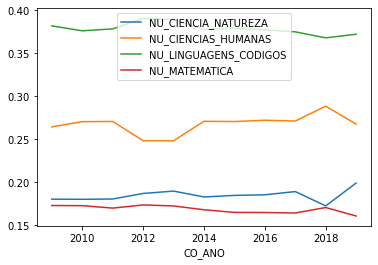

In [75]:
subjects=DF[['NU_CIENCIA_NATUREZA', 'NU_CIENCIAS_HUMANAS' ,'NU_LINGUAGENS_CODIGOS' ,'NU_MATEMATICA', 'CO_ANO']].groupby('CO_ANO').apply(lambda x: x.mean(axis=0))
subjects.drop('CO_ANO', axis=1).plot()

<AxesSubplot:xlabel='CO_ANO'>

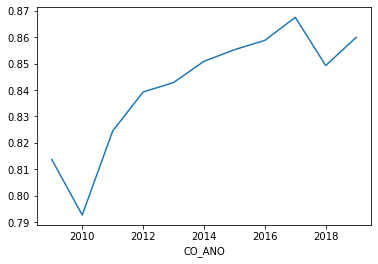

In [18]:
DF[(DF.CO_DEPENDENCIA_ADM== 2) | (DF.CO_DEPENDENCIA_ADM == 3)].groupby('CO_ANO')['IN_FOR_MAT'].mean().plot()
DF[(DF.CO_DEPENDENCIA_ADM== 2) | (DF.CO_DEPENDENCIA_ADM == 3)].groupby('CO_ANO')['IN_FOR_'].mean().plot()


In [11]:
DF['STD_MEAN_ESCOLA'] = DF.groupby(['CO_ANO','CO_ESCOLA'])['NU_NOTA_GERAL'].transform('std')
DF['DIVERSIDADE'] = DF.NU_TEACHERS/DF.NU_TEACHERS_DOMAIN

In [43]:
DF.head()

,Unnamed: 0,CO_ANO,CO_ESCOLA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,EDU_PAI,EDU_MAE,QT_PESSOAS_CASA,RENDA_MENSAL,NU_NOTA_GERAL,CO_MUNICIPIO,CO_UF,CO_DEPENDENCIA_ADM,IN_AGUA_INEXISTENTE,IN_ESGOTO_INEXISTENTE,IN_ENERGIA_INEXISTENTE,IN_LABORATORIO_INFORMATICA,IN_LABORATORIO_CIENCIAS,IN_SALA_ATENDIMENTO_ESPECIAL,IN_BIBLIOTECA,IN_SALA_LEITURA,IN_BANHEIRO,IN_BANHEIRO_PNE,QT_SALAS_UTILIZADAS,QT_EQUIP_TV,QT_EQUIP_DVD,QT_EQUIP_COPIADORA,QT_EQUIP_IMPRESSORA,QT_COMP_ALUNO,IN_INTERNET,IN_BANDA_LARGA,QT_FUNCIONARIOS,IN_ALIMENTACAO,IN_COMUM_MEDIO_MEDIO,IN_COMUM_MEDIO_INTEGRADO,IN_COMUM_MEDIO_NORMAL,IN_SALA_PROFESSOR,IN_QUADRA_ESPORTES,IN_COZINHA,IN_EQUIP_PARABOLICA,IN_ATIV_COMPLEMENTAR,QT_MATRICULAS,ID_QUIMICA,ID_FISICA,ID_MATEMATICA,ID_BIOLOGIA,ID_SOCIOLOGIA,ID_LINGUA_LITERAT_PORTUGUESA,ID_LINGUA_LITERAT_INGLES,ID_LINGUA_LITERAT_ESPANHOL,ID_ARTES,ID_EDUCACAO_FISICA,ID_HISTORIA,ID_GEOGRAFIA,ID_FILOSOFIA,ID_LICENCIATURA_1,ID_LICENCIATURA_2,ID_LICENCIATURA_3,TITULACAO,NU_GRADUACAO,NU_ESPECIALIZACAO,NU_MESTRADO,NU_DOUTORADO,ID_LINGUA_ESTRANGEIRA,ID_FISIO_SOCIO,NU_CIENCIA_NATUREZA,NU_CIENCIAS_HUMANAS,NU_LINGUAGENS_CODIGOS,NU_MATEMATICA,NU_TEACHERS_DOMAIN,NU_ESCOLAS,NU_LICENCIADOS,NU_TEACHERS,FOR_MATEMATICA,FOR_FISICA,FOR_QUIMICA,FOR_HISTORIA,FOR_BIOLOGIA,FOR_GEOGRAFIA,FOR_LING_PORTUGUES,FOR_LING_ESTRANGEIRA,FOR_FISIO_SOCIO,FOR_ARTES,FOR_EDUCACAO_FISICA,IN_FOR_MAT,IN_FOR_FIS,IN_FOR_QUI,IN_FOR_HIST,IN_FOR_BIO,IN_FOR_GEO,IN_FOR_PORT,IN_FOR_EST,IN_FOR_FISIO_SOCIO,IN_FOR_ARTES,IN_FOR_ED_FISICA,IN_FORM_DOCENTE,CO_PROFESSOR,CO_TURMA,IN_ESPECIALIZACAO,IN_MESTRADO,IN_DOUTORADO,CO_AREA_OCDE_1,CO_AREA_OCDE_2,CO_AREA_OCDE_3,OUTROS,IN_INFRA_NENHUMA,IN_INFRA_ELEMENTAR,IN_INFRA_BASICA,IN_INFRA_ADEQUADA,IN_INFRA_AVANCADA,IN_TP_ESCOLA,RENDA_NUM,RENDA_PERCAPITA
0,0,2009,33052182.0,19.0,1.0,0.0,2.0,409.2,323.1,376.7,360.5,475.0,0.0,0.0,3.0,2.0,388.90,3305752,33,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,16.0,1.0,1.0,1.0,1.0,10.0,1.0,1.0,110.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,35.666667,3.0,1.0,9.0,3.0,0.0,8.0,0.0,0.0,2.0,6.0,4.0,6.0,0.0,1.0,NaN,NaN,0.074074,42,12,0,0,5.0,1.0,0.145833,0.229167,0.4375,0.1875,48.0,1.291667,0.979167,48,6,0,2,4,1,3,8,0,0,2,6,0.833333,0.5,0.833333,1.0,0.666667,0.75,1.0,0.5,0.5,1.0,1.0,0.780303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,1.0,0.0,Municipal+Estadual,1558.5,519.500000
1,1,2009,33052182.0,18.0,0.0,1.0,2.0,390.1,448.2,397.2,422.0,750.0,2.0,3.0,2.0,2.0,481.50,3305752,33,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,16.0,1.0,1.0,1.0,1.0,10.0,1.0,1.0,110.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,35.666667,3.0,1.0,9.0,3.0,0.0,8.0,0.0,0.0,2.0,6.0,4.0,6.0,0.0,1.0,NaN,NaN,0.074074,42,12,0,0,5.0,1.0,0.145833,0.229167,0.4375,0.1875,48.0,1.291667,0.979167,48,6,0,2,4,1,3,8,0,0,2,6,0.833333,0.5,0.833333,1.0,0.666667,0.75,1.0,0.5,0.5,1.0,1.0,0.780303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,1.0,0.0,Municipal+Estadual,1558.5,779.250000
2,2,2009,33052182.0,17.0,0.0,3.0,3.0,408.6,525.6,509.9,486.5,700.0,2.0,3.0,3.0,3.0,526.12,3305752,33,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,16.0,1.0,1.0,1.0,1.0,10.0,1.0,1.0,110.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,35.666667,3.0,1.0,9.0,3.0,0.0,8.0,0.0,0.0,2.0,6.0,4.0,6.0,0.0,1.0,NaN,NaN,0.074074,42,12,0,0,5.0,1.0,0.145833,0.229167,0.4375,0.1875,48.0,1.291667,0.979167,48,6,0,2,4,1,3,8,0,0,2,6,0.833333,0.5,0.833333,1.0,0.666667,0.75,1.0,0.5,0.5,1.0,1.0,0.780303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,1.0,0.0,Municipal+Estadual,3636.5,1212.166667
3,3,2009,33052182.0,19.0,0.0,3.0,2.0,512.7,482.6,493.1,418.2,600.0,1.0,1.0,3.0,2.0,501.32,3305752,33,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,16.0,1.0,1.0,1.0,1.0,10.0,1.0,1.0,110.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,35.666667,3.0,1.0,9.0,3.0,0.0,8.0,0.0,0.0,2.0,6.0,4.0,6.0,0.0,1.0,NaN,NaN,0.074074,42,12,0,0,5.0,1.0,0.145833,0.229167,0.4375,0.1875,48.0,1.291667,0.979167,48,6,0,2,4,1,3,8,0,0,2,6,0.833333,0.5,0.833333,1.0,0.666667,0.75,1.0,0.5,0.5,1.0,1.0,0.780303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [12]:
DF.isnull().sum().to_frame().T

,Unnamed: 0,CO_ANO,CO_ESCOLA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,EDU_PAI,EDU_MAE,QT_PESSOAS_CASA,RENDA_MENSAL,NU_NOTA_GERAL,CO_MUNICIPIO,CO_UF,CO_DEPENDENCIA_ADM,IN_AGUA_INEXISTENTE,IN_ESGOTO_INEXISTENTE,IN_ENERGIA_INEXISTENTE,IN_LABORATORIO_INFORMATICA,IN_LABORATORIO_CIENCIAS,IN_SALA_ATENDIMENTO_ESPECIAL,IN_BIBLIOTECA,IN_SALA_LEITURA,IN_BANHEIRO,IN_BANHEIRO_PNE,QT_SALAS_UTILIZADAS,QT_EQUIP_TV,QT_EQUIP_DVD,QT_EQUIP_COPIADORA,QT_EQUIP_IMPRESSORA,QT_COMP_ALUNO,IN_INTERNET,IN_BANDA_LARGA,QT_FUNCIONARIOS,IN_ALIMENTACAO,IN_COMUM_MEDIO_MEDIO,IN_COMUM_MEDIO_INTEGRADO,IN_COMUM_MEDIO_NORMAL,IN_SALA_PROFESSOR,IN_QUADRA_ESPORTES,IN_COZINHA,IN_EQUIP_PARABOLICA,IN_ATIV_COMPLEMENTAR,QT_MATRICULAS,TITULACAO,NU_GRADUACAO,NU_ESPECIALIZACAO,NU_MESTRADO,NU_DOUTORADO,NU_CIENCIA_NATUREZA,NU_CIENCIAS_HUMANAS,NU_LINGUAGENS_CODIGOS,NU_MATEMATICA,NU_TEACHERS_DOMAIN,NU_ESCOLAS,NU_LICENCIADOS,NU_TEACHERS,IN_FORM_DOCENTE,IN_INFRA_NENHUMA,IN_INFRA_ELEMENTAR,IN_INFRA_BASICA,IN_INFRA_ADEQUADA,IN_INFRA_AVANCADA,IN_TP_ESCOLA,RENDA_NUM,RENDA_PERCAPITA,STD_MEAN_ESCOLA,DIVERSIDADE
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
#DF.to_csv('ALL_STUDENTS_v2.csv', index =False)
DF = pd.read_csv('ALL_STUDENTS_v2.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'ALL_STUDENTS_v2.csv'

In [44]:
#DF_SCHOOL = DF.copy()
DF_SCHOOL = pd.get_dummies(DF, columns=['TP_COR_RACA'])

new_cols = [col for col in DF_SCHOOL if col.startswith('TP_COR_RACA')] + ['TP_SEXO']

for x in new_cols:   
    DF_SCHOOL[x] = DF_SCHOOL.groupby(['CO_ANO','CO_ESCOLA'])[x].transform(sum)/ DF_SCHOOL.groupby(['CO_ANO','CO_ESCOLA'])[x].transform('count')

fields = ['EDU_PAI', 'EDU_MAE','QT_PESSOAS_CASA', 'RENDA_MENSAL','RENDA_PERCAPITA','NU_IDADE', 'NU_NOTA_CN',
             'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','NU_NOTA_GERAL', 'IN_FORM_DOCENTE', 'DIVERSIDADE']

for i in fields:   
    
            DF_SCHOOL[i] = DF_SCHOOL.groupby(['CO_ANO','CO_ESCOLA'])[i].transform('mean')
        
DF_SCHOOL.drop_duplicates(['CO_ANO','CO_ESCOLA'], inplace=True)    

MemoryError: Unable to allocate 7.66 GiB for an array with shape (98, 10489478) and data type float64

In [6]:
DF.groupby('CO_ANO')['NU_TEACHERS'].count()

CO_ANO
2009     631604
2010     774937
2011     911309
2012     954009
2013    1049134
2014    1070778
2015    1128398
2016    1192812
2017    1078598
2018     920310
2019     777589
Name: NU_TEACHERS, dtype: int64

In [7]:
DF_SCHOOL.to_csv('ALL_SCHOOLS_v2.csv', index =False)

In [8]:
#FRIENDLY NAMES FOR GRAPHS. 

DF.loc[(DF.CO_DEPENDENCIA_ADM== 2) | (DF.CO_DEPENDENCIA_ADM == 3), 'CO_DEPENDENCIA_ADM']= 'Municipal+Estadual'
DF.loc[(DF.CO_DEPENDENCIA_ADM == 4), 'CO_DEPENDENCIA_ADM'] = 'Privada'
DF.loc[(DF.CO_DEPENDENCIA_ADM == 1), 'CO_DEPENDENCIA_ADM'] = 'Federal'


DF.loc[(DF.TP_COR_RACA == 0), 'TP_COR_RACA'] = 'Não declarada'
DF.loc[(DF.TP_COR_RACA == 1), 'TP_COR_RACA'] = 'Branca'
DF.loc[(DF.TP_COR_RACA == 2), 'TP_COR_RACA'] = 'Preta'
DF.loc[(DF.TP_COR_RACA == 3), 'TP_COR_RACA'] = 'Parda'
DF.loc[(DF.TP_COR_RACA == 4), 'TP_COR_RACA'] = 'Amarela'
DF.loc[(DF.TP_COR_RACA == 5), 'TP_COR_RACA'] = 'Indígena'

DF.loc[(DF.TP_SEXO == 0), 'TP_SEXO'] = 'Feminino'
DF.loc[(DF.TP_SEXO == 1), 'TP_SEXO'] = 'Masculino'

DF.loc[(DF.EDU_PAI == 0), 'EDU_PAI'] = '< 4ªSérie/Não sei'
DF.loc[(DF.EDU_PAI == 1), 'EDU_PAI'] = '4ª Série'
DF.loc[(DF.EDU_PAI == 2), 'EDU_PAI'] = '8ª Série'
DF.loc[(DF.EDU_PAI == 3), 'EDU_PAI'] = 'Ens. Médio'
DF.loc[(DF.EDU_PAI == 4), 'EDU_PAI'] = 'Faculdade'
DF.loc[(DF.EDU_PAI == 5), 'EDU_PAI'] = 'Pós-Gradução'


DF.loc[(DF.EDU_MAE == 0), 'EDU_MAE'] = '< 4ªSérie/Não sei'
DF.loc[(DF.EDU_MAE == 1), 'EDU_MAE'] = '4ª Série'
DF.loc[(DF.EDU_MAE == 2), 'EDU_MAE'] = '8ª Série'
DF.loc[(DF.EDU_MAE == 3), 'EDU_MAE'] = 'Ens. Médio'
DF.loc[(DF.EDU_MAE == 4), 'EDU_MAE'] = 'Faculdade'
DF.loc[(DF.EDU_MAE == 5), 'EDU_MAE'] = 'Pós-Gradução'


DF.loc[(DF.RENDA_MENSAL == 0), 'RENDA_MENSAL'] = 'Nenhuma'
DF.loc[(DF.RENDA_MENSAL == 1), 'RENDA_MENSAL'] = 'Até 1 sal.'
DF.loc[(DF.RENDA_MENSAL == 2), 'RENDA_MENSAL'] = '1 a 2 sal.'
DF.loc[(DF.RENDA_MENSAL == 3), 'RENDA_MENSAL'] = '2 a 5 sal.'
DF.loc[(DF.RENDA_MENSAL == 4), 'RENDA_MENSAL'] = '5 a 10 sal.'
DF.loc[(DF.RENDA_MENSAL == 5), 'RENDA_MENSAL'] = 'Acima de 10 sal.'



In [9]:
DF.to_csv('ALL_STUDENTS_v2_graphs.csv', index =False)

In [32]:
DF_SCHOOL[fields]

,EDU_PAI,EDU_MAE,QT_PESSOAS_CASA,RENDA_MENSAL,RENDA_PERCAPITA,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_GERAL
0,< 4ªSérie/Não sei,< 4ªSérie/Não sei,3.0,1 a 2 sal.,519.500000,19.0,409.2,323.1,376.7,360.5,475.0,388.90
1,8ª Série,Ens. Médio,2.0,1 a 2 sal.,779.250000,18.0,390.1,448.2,397.2,422.0,750.0,481.50
2,8ª Série,Ens. Médio,3.0,2 a 5 sal.,1212.166667,17.0,408.6,525.6,509.9,486.5,700.0,526.12
3,4ª Série,4ª Série,3.0,1 a 2 sal.,519.500000,19.0,512.7,482.6,493.1,418.2,600.0,501.32
4,< 4ªSérie/Não sei,< 4ªSérie/Não sei,3.0,2 a 5 sal.,1212.166667,18.0,269.4,384.0,323.0,347.8,425.0,349.84
...,...,...,...,...,...,...,...,...,...,...,...,...
777584,8ª Série,Pós-Gradução,3.0,Até 1 sal.,173.166667,18.0,469.4,375.1,538.1,612.7,560.0,511.06
777585,8ª Série,Ens. Médio,3.0,Nenhuma,0.000000,17.0,493.8,503.9,424.9,491.8,520.0,486.88
777586,4ª Série,< 4ªSérie/Não sei,4.0,Nenhuma,0.000000,17.0,498.6,366.7,427.8,433.6,320.0,409.34
777587,< 4ªSérie/Não sei,8ª Série,3.0,Até 1 sal.,173.166667,17.0,426.4,468.4,419.2,498.3,480.0,458.46


In [31]:
DF_SCHOOL = pd.get_dummies(DF, columns=(['TP_COR_RACA', 'TP_SEXO']))

new_cols = [col for col in DF_SCHOOL if col.startswith('TP_COR_RACA')]
new_cols += [col for col in DF_SCHOOL if col.startswith('TP_SEXO')]

for x in new_cols:   
    DF_SCHOOL[x] = DF_SCHOOL.groupby(['CO_ANO','CO_ESCOLA'])[x].transform(sum)/ DF_SCHOOL.groupby(['CO_ANO','CO_ESCOLA'])[x].transform('count')

fields = ['EDU_PAI', 'EDU_MAE','QT_PESSOAS_CASA', 'RENDA_MENSAL','RENDA_PERCAPITA','NU_IDADE', 'NU_NOTA_CN',
             'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','NU_NOTA_GERAL']

for i in fields:   
    
            DF_SCHOOL[i] = DF_SCHOOL.groupby(['CO_ANO','CO_ESCOLA'])[i].transform('mean')
        
DF_SCHOOL.drop_duplicates(['CO_ANO','CO_ESCOLA'], inplace=True)    

DataError: No numeric types to aggregate

In [ ]:
DF_SCHOOL.to_csv('ALL_SCHOOLS_v2_graphs.csv', index =False)